In [2]:
not.installed <- function(pkg) !is.element(pkg, installed.packages()[,1])

if (not.installed("MASS"))  install.packages("MASS")  # we need the MASS package

library(MASS)  #  load the MASS package

In [100]:
data(Boston)
head(Boston)
nrow(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


[1] 506

In [103]:
not.installed <- function(pkg) !is.element(pkg, installed.packages()[,1])
    
if (not.installed("DAAG")) install.packages("DAAG", repos="http://cran.us.r-project.org")

library(DAAG)

In [104]:
# simple linear regression
fit = lm(medv ~ ., data=Boston)
# plot(fit)

In [105]:
not.installed <- function(pkg) !is.element(pkg, installed.packages()[,1])
    
if (not.installed("caret")) install.packages("caret", repos="http://cran.us.r-project.org")

library(caret)

### linear regression - caret

In [67]:
# lmFit <- train(medv ~ .,
#                data = Boston,
#                method = "lm",
#                trControl = trainControl(method = "cv"))
# print(lmFit)
# summary(lmFit)

In [66]:
# residuals(lmFit)

In [9]:
# fitted_value = fitted(lmFit)

In [68]:
# actual_value = Boston$medv
# head(Boston)

In [62]:
# plot(medv~zn+crim, data=Boston)
# plot(Boston$zn+Boston$crim+Boston$indus+Boston$chas+Boston$nox+Boston$rm+Boston$age+Boston$dis+Boston$rad+Boston$tax+Boston$ptratio+Boston$black+Boston$lstat, Boston$medv)

# abline(lm(Boston$medv~Boston$zn+Boston$crim+Boston$indus+Boston$chas+Boston$nox+Boston$rm+Boston$age+Boston$dis+Boston$rad+Boston$tax+Boston$ptratio+Boston$black+Boston$lstat))

### linear regression

In [94]:
if (not.installed("hydroGOF")) install.packages("hydroGOF", repos="http://cran.us.r-project.org")
library(hydroGOF)

In [108]:
k.folds <- function(k) {
    folds <- createFolds(Boston$medv, k = k, list = TRUE, returnTrain = TRUE)
    for (i in 1:k) {
        model <- lm(medv ~ ., data=Boston[folds[[i]],])
        predictions <- predict(object=model, newdata=Boston[-folds[[i]],])
#         all_predictions <- c(all_predictions, predictions)
        err <- c(err, rmse(predictions,Boston[-folds[[i]],]$medv))
#         print(summary(model))
    }
#     all_predictions
    err
}

set.seed(100)
err <- c()
# all_predictions <- c()
err <- k.folds(10)
err
# folds <- createFolds(Boston$medv, k = 2, list = TRUE, returnTrain = TRUE)
# for (i in 1:2) {
#     model <- lm(medv ~ ., data=Boston[folds[[i]],])
#     predictions <- predict(object=model, newdata=Boston[-folds[[i]],])
#     print(rmse(predictions,Boston[-folds[[i]],]$medv))
# }

     RMSE  Rsquared 
5.1122864 0.7487526 
    RMSE Rsquared 
5.162387 0.672969 
     RMSE  Rsquared 
5.4107366 0.7514678 
     RMSE  Rsquared 
5.7175387 0.6001598 
     RMSE  Rsquared 
5.5161673 0.6799678 
     RMSE  Rsquared 
4.6158912 0.8209627 
     RMSE  Rsquared 
4.5413854 0.7641593 
     RMSE  Rsquared 
4.1460888 0.7750097 
     RMSE  Rsquared 
3.7151478 0.8120371 
     RMSE  Rsquared 
4.4809792 0.6738982 


[1] 5.112286 5.162387 5.410737 5.717539 5.516167 4.615891 4.541385 4.146089
 [9] 3.715148 4.480979

In [107]:
mean.rmse <- mean(err)
mean.rmse

[1] 4.841861

### Visualization

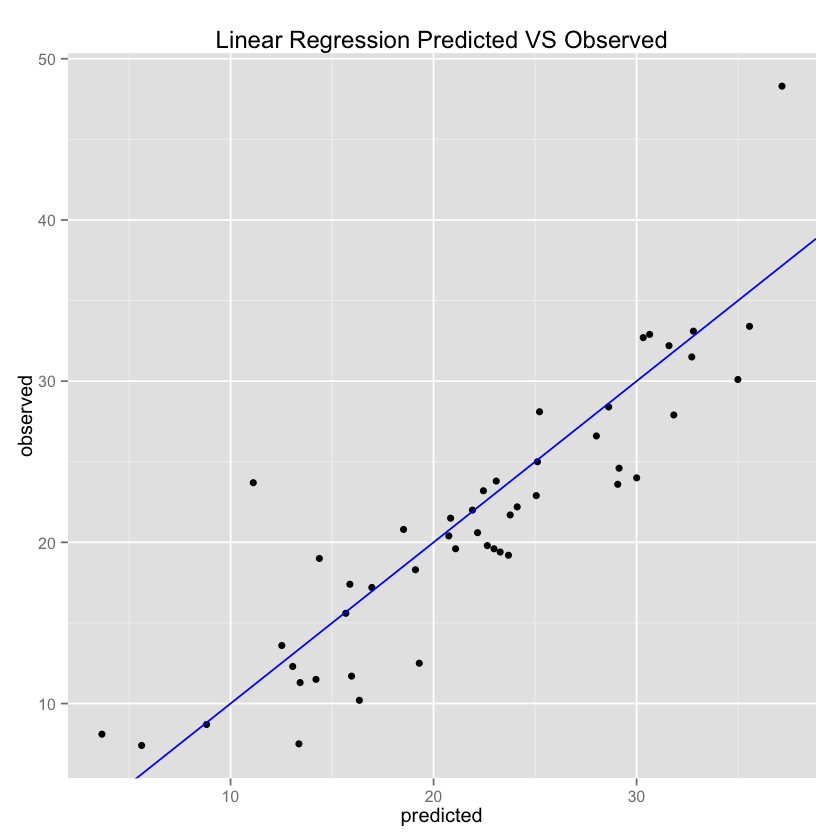

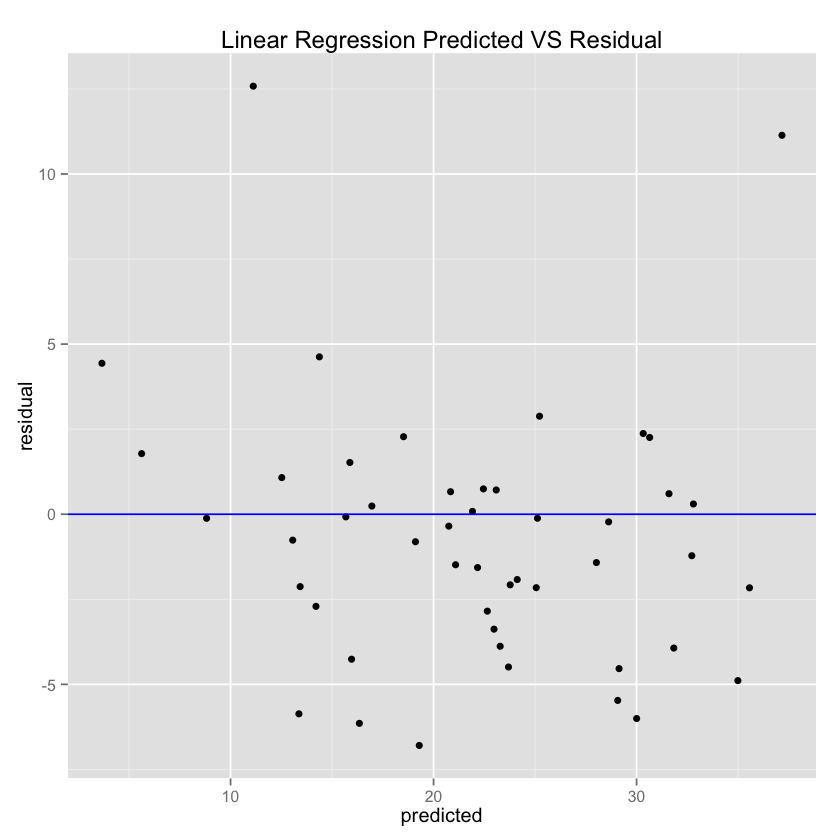

In [45]:
# visulization the performance of the model
# library(ggplot2)
# df_lm <- data.frame(predicted = lmPred, observed = testset$medv)
# ggplot(df_lm, aes(x = predicted, y = observed)) +
#   geom_point() +
#   geom_abline(intercept = 0, slope = 1, colour = "blue") +
#   ggtitle("Linear Regression Predicted VS Observed")

# df_lm2 <- data.frame(predicted = lmPred, residual = testset$medv - lmPred)
# ggplot(df_lm2, aes(x = predicted, y = residual)) +
#   geom_point() +
#   geom_hline(yintercept = 0, colour = "blue") +
#   ggtitle("Linear Regression Predicted VS Residual")


## Ridge Regression

In [109]:
### ridge regression - 0.1
ridge_grid <- expand.grid(lambda = seq(0, .1, length = 15))
set.seed(100)
ridge_model <- train(medv ~ .,
                   data = Boston,
                   method = "ridge",
                   preProcess = c("center", "scale"),
                   tuneGrid = ridge_grid,
                   trControl = trainControl(method= "cv"))
ridge_model
# ridge_pred <- predict(ridge_model, testset)
# postResample(pred = ridge_pred,  obs = testset$medv)

Ridge Regression 

506 samples
 13 predictor

Pre-processing: centered (13), scaled (13) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 455, 456, 456, 455, 455, 455, ... 
Resampling results across tuning parameters:

  lambda       RMSE      Rsquared   RMSE SD    Rsquared SD
  0.000000000  4.841861  0.7299384  0.6451659  0.07053065 
  0.007142857  4.839480  0.7303230  0.6497413  0.07176517 
  0.014285714  4.838999  0.7304902  0.6548439  0.07289572 
  0.021428571  4.839785  0.7305147  0.6602515  0.07393266 
  0.028571429  4.841461  0.7304417  0.6658337  0.07488616 
  0.035714286  4.843792  0.7303001  0.6715114  0.07576543 
  0.042857143  4.846626  0.7301090  0.6772347  0.07657854 
  0.050000000  4.849862  0.7298813  0.6829718  0.07733250 
  0.057142857  4.853431  0.7296261  0.6887017  0.07803337 
  0.064285714  4.857284  0.7293499  0.6944109  0.07868641 
  0.071428571  4.861386  0.7290575  0.7000903  0.07929622 
  0.078571429  4.865713  0.7287524  0.7057341  0.07986680

In [110]:
# ridge_grid <- expand.grid(lambda = seq(0, .001, length = 15))
ridge_grid <- expand.grid(lambda = c(1, 0.1, 0.01, 0.001))
set.seed(100)
ridge_model <- train(medv ~ .,
                   data = Boston,
                   method = "ridge",
                   preProcess = c("center", "scale"),
                   tuneGrid = ridge_grid,
                   trControl = trainControl(method= "cv"))
ridge_model
ridge_pred <- predict(ridge_model, testset)
postResample(pred = ridge_pred,  obs = testset$medv)

Ridge Regression 

506 samples
 13 predictor

Pre-processing: centered (13), scaled (13) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 455, 456, 456, 455, 455, 455, ... 
Resampling results across tuning parameters:

  lambda  RMSE      Rsquared   RMSE SD    Rsquared SD
  0.001   4.841379  0.7300093  0.6457625  0.07071009 
  0.010   4.839102  0.7304109  0.6517343  0.07222930 
  0.100   4.879879  0.7277846  0.7224212  0.08137637 
  1.000   6.393033  0.6839727  1.1647402  0.09222020 

RMSE was used to select the optimal model using  the smallest value.
The final value used for the model was lambda = 0.01. 

RMSE  Rsquared 
3.8231923 0.7951684

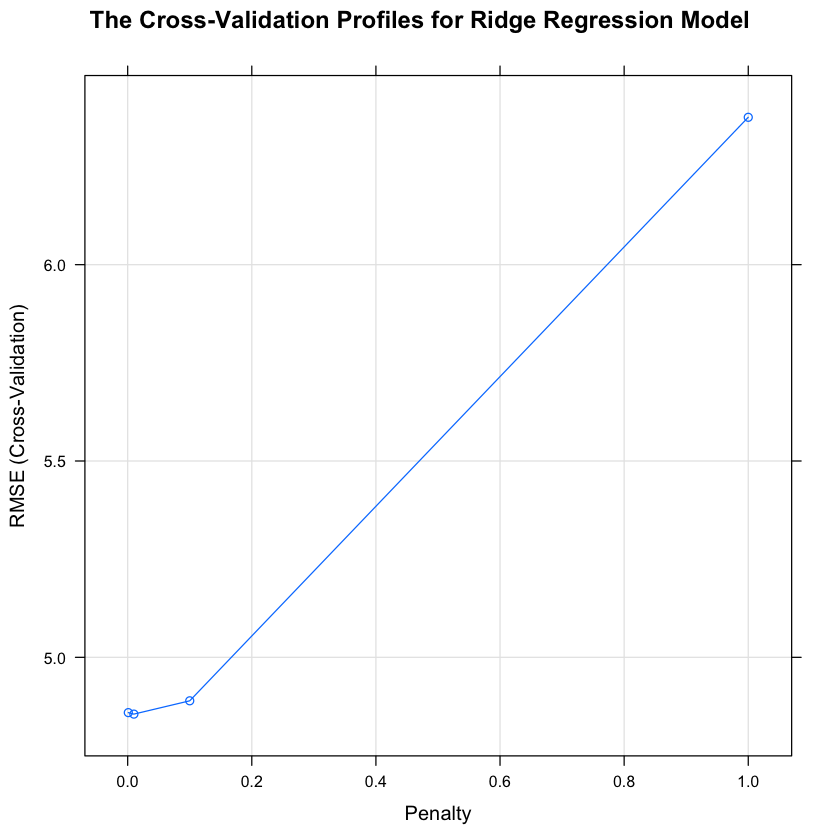

In [61]:
update(plot(ridge_model), xlab = "Penalty",
       main = "The Cross-Validation Profiles for Ridge Regression Model")

## Lasso

In [111]:
### lasso
# need prprocess to data
lasso_grid <- expand.grid(fraction = seq(.05, 1, length = 20))
set.seed(100)
lasso_model <- train(medv ~ .,
                     data = Boston,
                     method = "lasso",
                     preProcess = c("center", "scale"),
                     tuneGrid = lasso_grid,
                     trControl = trainControl(method= "cv"))
lasso_model
# lasso_pred <- predict(lasso_model, testset)
# postResample(pred = lasso_pred,  obs = testset$medv)

The lasso 

506 samples
 13 predictor

Pre-processing: centered (13), scaled (13) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 455, 456, 456, 455, 455, 455, ... 
Resampling results across tuning parameters:

  fraction  RMSE      Rsquared   RMSE SD    Rsquared SD
  0.05      8.348352  0.5735492  1.1327604  0.07246578 
  0.10      7.629564  0.6250124  1.0983416  0.07372327 
  0.15      6.970302  0.6394830  1.0497601  0.08124005 
  0.20      6.405943  0.6482776  0.9935616  0.08960572 
  0.25      5.932718  0.6696209  0.9265538  0.09270024 
  0.30      5.556784  0.6797869  0.8676191  0.09300290 
  0.35      5.324148  0.6861087  0.8104286  0.09459130 
  0.40      5.193702  0.6933912  0.7617466  0.09363027 
  0.45      5.131131  0.6998355  0.7240742  0.09146567 
  0.50      5.062285  0.7070568  0.7068524  0.08844347 
  0.55      5.009256  0.7122770  0.6896894  0.08574952 
  0.60      4.966524  0.7165712  0.6706342  0.08279629 
  0.65      4.933525  0.7202272  0.6593808  

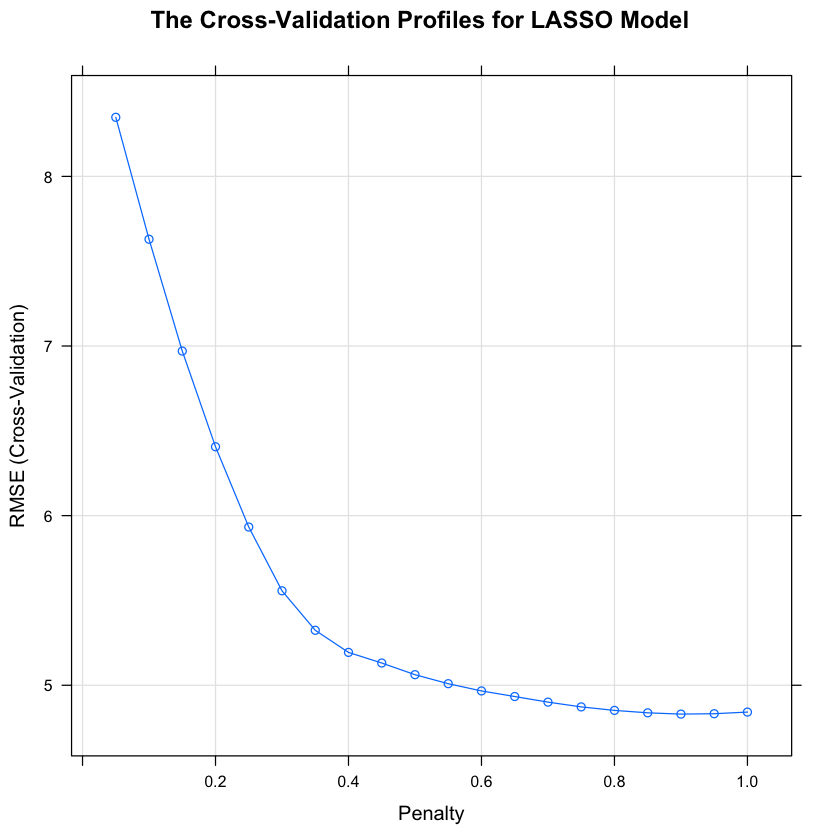

In [112]:
update(plot(lasso_model), xlab = "Penalty",
       main = "The Cross-Validation Profiles for LASSO Model")